In [1]:
from scipy.ndimage.filters import gaussian_filter
from matplotlib.patches import Polygon
import matplotlib.patches as patches
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

sns.set_style('darkgrid',
              {
                  'axes.facecolor':'black',
                  'axes.grid':False
              })

In [2]:
data = pd.read_csv("globalsignal.csv",index_col=0)
cols = np.sort(data.columns)

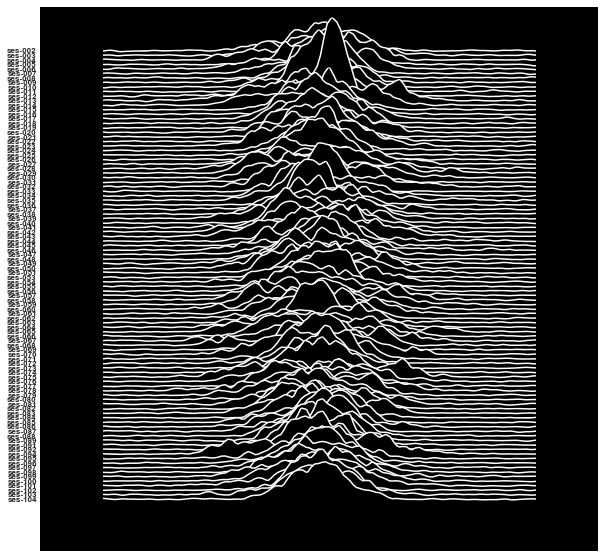

In [3]:
hgt = 1000
zorder = 1
ticks = []
labels = []

fig,ax = plt.subplots(1,figsize=(10,10))

for column in cols:
    
    # get global signal
    globalts = np.array(data[column].dropna())
    if column == 'ses-093' or column == 'ses-105':
        continue # because these sessions really ruin the image with too narrow distributions :-) 
    globalts = globalts-np.mean(globalts)
    bins = np.arange(-40,40,0.6)
    hst = np.histogram(globalts,bins=bins)
    
    # derive x and y
    hstsm = np.array(hst[0]) + hgt
    hstsm = hstsm + np.random.normal(0,0.4,len(hstsm)) # note: some random noise added for aesthetics
    hstsm = gaussian_filter(hstsm,1)
    bins = np.arange(-39.7,39.7,0.6)
    
    # polygon under the histogram
    hstpg = np.append(hstsm,np.zeros(len(hstsm)))
    bnspg = np.append(bins,bins[::-1])
    points = [(bnspg[x],hstpg[x]) for x in range(len(hstpg))]
    triangle = plt.Polygon(points,closed=None,edgecolor=None,color='black',lw=2,zorder=zorder)
    ax.add_artist(triangle)
    
    # draw plot
    ax.plot(bins,hstsm,color='white',lw=5,zorder=zorder)
    ticks.append(hgt+1)
    labels.append(column)
    hgt -= 3
    zorder+=1

# cut off borders to prevent patch effect
rectpoints = [(-50,hgt-30),(-50,1100),(-39,1100),(-39,hgt-30)]
rect = plt.Polygon(rectpoints,closed=None,edgecolor=None,color='black',lw=2,zorder=zorder)
ax.add_artist(rect)
rectpoints = [(50,hgt-30),(50,1100),(39,1100),(39,hgt-30)]
rect = plt.Polygon(rectpoints,closed=None,edgecolor=None,color='black',lw=2,zorder=zorder)
ax.add_artist(rect)

# plot test
# ax.text(0,hgt-20,"MY CONNECTOME",color='white',size=40,
#         horizontalalignment='center', verticalalignment='center',zorder=zorder)

plt.xlim([-50,50])
plt.ylim([hgt-30,1030])
plt.yticks(ticks,labels)
plt.xticks([])

ticks_font = font_manager.FontProperties(family='Arial', style='normal',
    size=8, weight='heavy')
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.autoscale_view()
plt.show()
fig.savefig("unknown_pleasures_myconnectome.pdf", bbox_inches='tight')
fig.savefig("unknown_pleasures_myconnectome.jpg", bbox_inches='tight')